In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Finding minimum value of a function

## One dimensional function
$f(x) = x^2-x+3$

In [2]:
def f(x):
    return x**2 - x + 3

Simple plot of the function. Note that if the fucntion had many ($>2$ parameters, then plotting would not be possible).

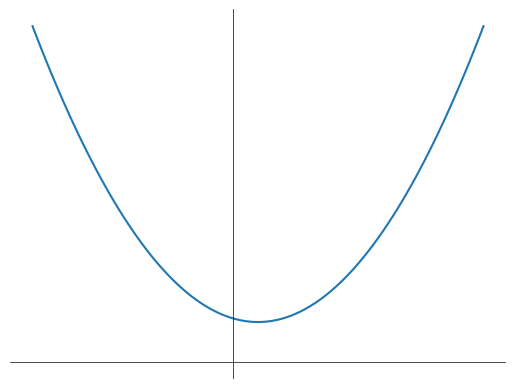

In [3]:
xs = np.linspace(-4, 5, 100)
ys = f(xs)
plt.plot(xs, ys)
plt.axis('off')
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.show()

### Method 1: Grid search

In [4]:
x_vals = [-1.75, -0.75, -0.25, 0.25, 0.75, 1.25, 1.75, 2.25, 2.75, 3.25]
for x in x_vals:
    print(f'f({x}) = {f(x)}')

f(-1.75) = 7.8125
f(-0.75) = 4.3125
f(-0.25) = 3.3125
f(0.25) = 2.8125
f(0.75) = 2.8125
f(1.25) = 3.3125
f(1.75) = 4.3125
f(2.25) = 5.8125
f(2.75) = 7.8125
f(3.25) = 10.3125


More visual version:

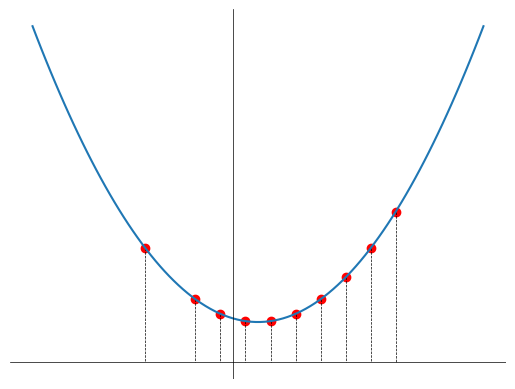

In [5]:
x_vals = [-1.75, -0.75, -0.25, 0.25, 0.75, 1.25, 1.75, 2.25, 2.75, 3.25]
for x in x_vals:
    plt.scatter(x, f(x), color='red')
    plt.plot([x, x], [f(x), 0], color='black', lw=0.5, linestyle='--')
plt.plot(xs, ys)
plt.axis('off')
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.show()

Minimum value of $f(x)$ found is $2.8125$ at $x=0.25$ and $x=0.75$.

### Method 2: Dichotomy

In [6]:
a = -5
b = 5
for i in range(6):
    print(f"a: f({a}) = {f(a)} \t b: f({b}) = {f(b)}", end='\t\t')
    if f(a)>f(b):
        a = (a+b)/2
        print(f'set a = {a}')
    else:
        b = (a+b)/2
        print(f'set b = {b}')

x = ((a+b)/2)
print(f"best guess: x = {x}")

a: f(-5) = 33 	 b: f(5) = 23		set a = 0.0
a: f(0.0) = 3.0 	 b: f(5) = 23		set b = 2.5
a: f(0.0) = 3.0 	 b: f(2.5) = 6.75		set b = 1.25
a: f(0.0) = 3.0 	 b: f(1.25) = 3.3125		set b = 0.625
a: f(0.0) = 3.0 	 b: f(0.625) = 2.765625		set a = 0.3125
a: f(0.3125) = 2.78515625 	 b: f(0.625) = 2.765625		set a = 0.46875
best guess: x = 0.546875


More visual version

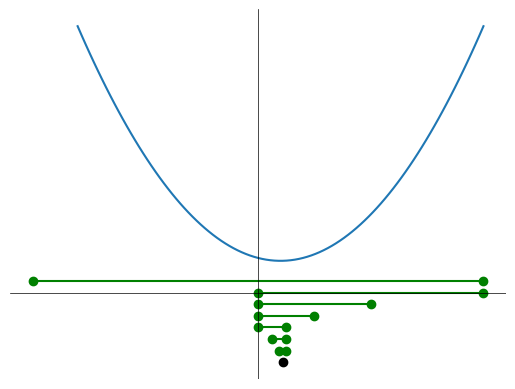

In [7]:
a = -5
b = 5
plt.plot([a,b], [1, 1], color='green')
plt.scatter([a,b], [1, 1], color='green')
for i in range(6):
    if f(a)>f(b):
        a = (a+b)/2
    else:
        b = (a+b)/2
    plt.plot([a,b], [-i, -i], color='green')
    plt.scatter([a,b], [-i, -i], color='green')
x = ((a+b)/2)
plt.scatter([x], [-6], color='black')
plt.plot(xs, ys)
plt.axis('off')
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.show()

### Method 3: Gradient descent

We first calculate the derivative $f'(x) = 2x-1$

In [8]:
def df(x):
    return 2*x-1

In [9]:
lr = 0.8
x = -1
l = [x]
for _ in range(7):
    print(f"f({x:.2f}) = {f(x):.2f}  \t f'({x:.2f}) = {df(x):.2f}")
    x = x - lr * df(x)
    l.append(x)
print(f'Final guess: x = {x:.2f}')

xs = np.linspace(min(l)-0.5, max(l+[2])+0.5, 100)
ys = f(xs)

f(-1.00) = 5.00  	 f'(-1.00) = -3.00
f(1.40) = 3.56  	 f'(1.40) = 1.80
f(-0.04) = 3.04  	 f'(-0.04) = -1.08
f(0.82) = 2.85  	 f'(0.82) = 0.65
f(0.31) = 2.79  	 f'(0.31) = -0.39
f(0.62) = 2.76  	 f'(0.62) = 0.23
f(0.43) = 2.75  	 f'(0.43) = -0.14
Final guess: x = 0.54


Let's try other values for learning rate

In [10]:
for lr in [0.3, 0.01, 1, 2]:
    print(f'\t learning rate: {lr}')
    x = -1
    l = [x]
    for _ in range(7):
        print(f"f({x:.2f}) = {f(x):.2f}  \t f'({x:.2f}) = {df(x):.2f}")
        x = x - lr * df(x)
        l.append(x)
    print(f'Final guess: x = {x:.2f} \n\n\n')

    xs = np.linspace(min(l)-0.5, max(l+[2])+0.5, 100)
    ys = f(xs)

	 learning rate: 0.3
f(-1.00) = 5.00  	 f'(-1.00) = -3.00
f(-0.10) = 3.11  	 f'(-0.10) = -1.20
f(0.26) = 2.81  	 f'(0.26) = -0.48
f(0.40) = 2.76  	 f'(0.40) = -0.19
f(0.46) = 2.75  	 f'(0.46) = -0.08
f(0.48) = 2.75  	 f'(0.48) = -0.03
f(0.49) = 2.75  	 f'(0.49) = -0.01
Final guess: x = 0.50 



	 learning rate: 0.01
f(-1.00) = 5.00  	 f'(-1.00) = -3.00
f(-0.97) = 4.91  	 f'(-0.97) = -2.94
f(-0.94) = 4.83  	 f'(-0.94) = -2.88
f(-0.91) = 4.74  	 f'(-0.91) = -2.82
f(-0.88) = 4.66  	 f'(-0.88) = -2.77
f(-0.86) = 4.59  	 f'(-0.86) = -2.71
f(-0.83) = 4.52  	 f'(-0.83) = -2.66
Final guess: x = -0.80 



	 learning rate: 1
f(-1.00) = 5.00  	 f'(-1.00) = -3.00
f(2.00) = 5.00  	 f'(2.00) = 3.00
f(-1.00) = 5.00  	 f'(-1.00) = -3.00
f(2.00) = 5.00  	 f'(2.00) = 3.00
f(-1.00) = 5.00  	 f'(-1.00) = -3.00
f(2.00) = 5.00  	 f'(2.00) = 3.00
f(-1.00) = 5.00  	 f'(-1.00) = -3.00
Final guess: x = 2.00 



	 learning rate: 2
f(-1.00) = 5.00  	 f'(-1.00) = -3.00
f(5.00) = 23.00  	 f'(5.00) = 9.00
f(-13.00) 

Visually:

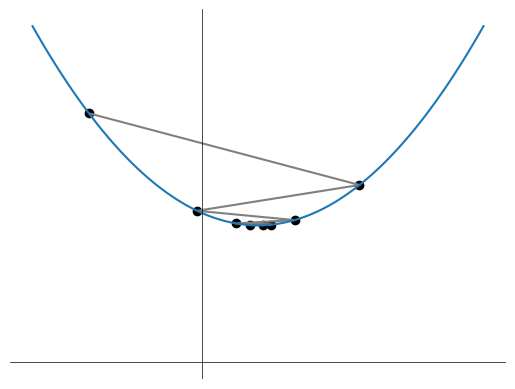

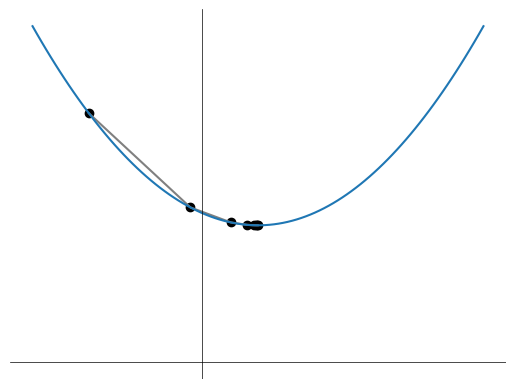

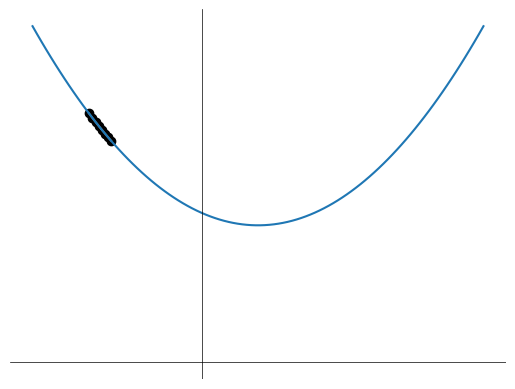

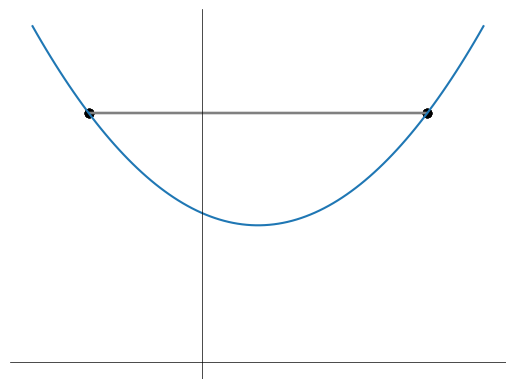

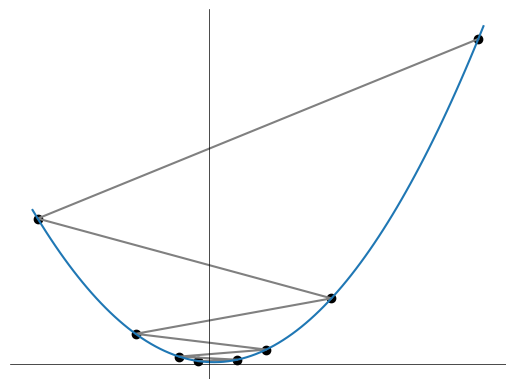

In [11]:
for lr in [0.8, 0.3, 0.01, 1, 1.25]:
    x = -1
    l = [x]
    for _ in range(7):
        x = x - lr * df(x)
        l.append(x)

    plt.plot(l, [f(x) for x in l], color='grey')
    plt.scatter(l, [f(x) for x in l], color='black')
    xs = np.linspace(min(l)-0.5, max(l+[2])+0.5, 100)
    ys = f(xs)
    plt.plot(xs, ys)
    plt.axis('off')
    plt.axhline(0, color='black', lw=0.5)
    plt.axvline(0, color='black', lw=0.5)
    plt.show()


## Two dimensional function

$f(x,y) = (x+y-1)^2 + \frac{1}{5}(x-y)^2$

In [12]:
def f(x, y):
    return (x+y-1)**2 + 0.2*(x-y)**2

Plotting the function as a 2D surface.
Plotting log of the function helps to see the minimum more clearly.

In [13]:
# interactive
x = np.linspace(-1, 2, 100)
y = np.linspace(-1, 2, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
Zlog = np.log(Z)
go.Figure(data=[go.Surface(z=Z)])

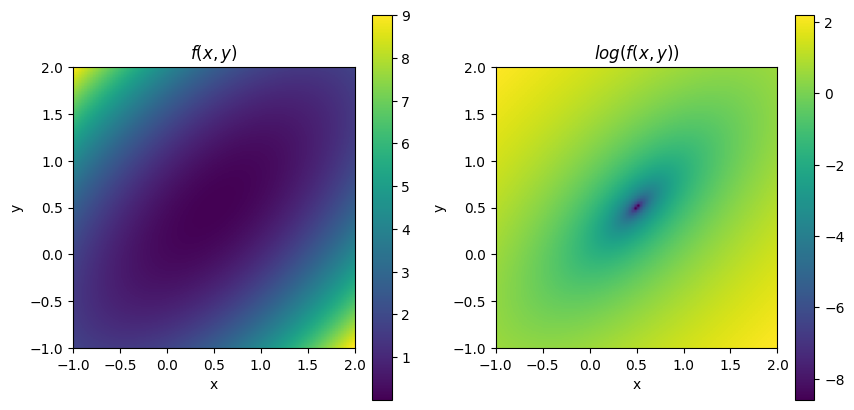

In [14]:
# not interactive
x = np.linspace(-1, 2, 100)
y = np.linspace(-1, 2, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
Zlog = np.log(Z)

# plot a heatmap of the function
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(Z, extent=(-1, 2, -1, 2))
plt.colorbar()
plt.title('$f(x,y)$')
plt.xlabel('x')
plt.ylabel('y')
plt.subplot(1,2,2)
plt.imshow(Zlog, extent=(-1, 2, -1, 2))
plt.colorbar()
plt.title('$log(f(x,y))$')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Method 1: Grid search

In [15]:
for x in np.arange(-1, 2.5, 0.5):
    for y in np.arange(-1, 2.5, 0.5):
        print(f'f({x}, {y}) = {f(x, y)}')

f(-1.0, -1.0) = 9.0
f(-1.0, -0.5) = 6.3
f(-1.0, 0.0) = 4.2
f(-1.0, 0.5) = 2.7
f(-1.0, 1.0) = 1.8
f(-1.0, 1.5) = 1.5
f(-1.0, 2.0) = 1.8
f(-0.5, -1.0) = 6.3
f(-0.5, -0.5) = 4.0
f(-0.5, 0.0) = 2.3
f(-0.5, 0.5) = 1.2
f(-0.5, 1.0) = 0.7
f(-0.5, 1.5) = 0.8
f(-0.5, 2.0) = 1.5
f(0.0, -1.0) = 4.2
f(0.0, -0.5) = 2.3
f(0.0, 0.0) = 1.0
f(0.0, 0.5) = 0.3
f(0.0, 1.0) = 0.2
f(0.0, 1.5) = 0.7
f(0.0, 2.0) = 1.8
f(0.5, -1.0) = 2.7
f(0.5, -0.5) = 1.2
f(0.5, 0.0) = 0.3
f(0.5, 0.5) = 0.0
f(0.5, 1.0) = 0.3
f(0.5, 1.5) = 1.2
f(0.5, 2.0) = 2.7
f(1.0, -1.0) = 1.8
f(1.0, -0.5) = 0.7
f(1.0, 0.0) = 0.2
f(1.0, 0.5) = 0.3
f(1.0, 1.0) = 1.0
f(1.0, 1.5) = 2.3
f(1.0, 2.0) = 4.2
f(1.5, -1.0) = 1.5
f(1.5, -0.5) = 0.8
f(1.5, 0.0) = 0.7
f(1.5, 0.5) = 1.2
f(1.5, 1.0) = 2.3
f(1.5, 1.5) = 4.0
f(1.5, 2.0) = 6.3
f(2.0, -1.0) = 1.8
f(2.0, -0.5) = 1.5
f(2.0, 0.0) = 1.8
f(2.0, 0.5) = 2.7
f(2.0, 1.0) = 4.2
f(2.0, 1.5) = 6.3
f(2.0, 2.0) = 9.0


Note that it becomes computationally expensive to search for the minimum in a 2D grid.
For higher dimensions, this method is not feasible.

More visually:

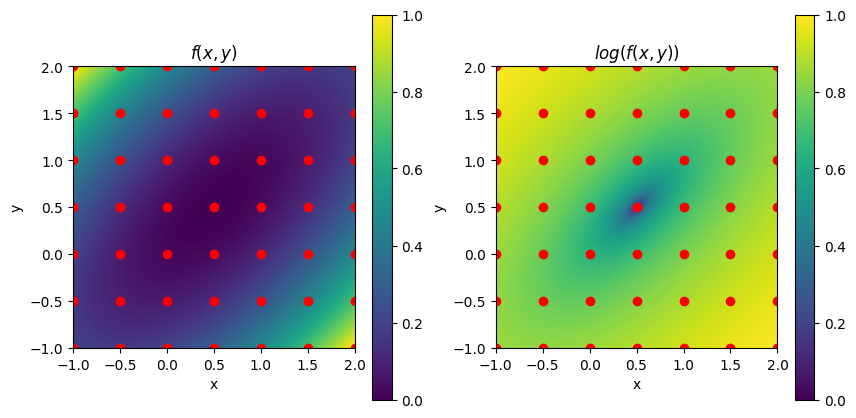

In [16]:

# plot a heatmap of the function
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(Z, extent=(-1, 2, -1, 2))
for x in np.arange(-1, 2.5, 0.5):
    for y in np.arange(-1, 2.5, 0.5):
        plt.scatter(x, y, color='red')
plt.colorbar()
plt.title('$f(x,y)$')
plt.xlabel('x')
plt.ylabel('y')
plt.subplot(1,2,2)
plt.imshow(Zlog, extent=(-1, 2, -1, 2))
for x in np.arange(-1, 2.5, 0.5):
    for y in np.arange(-1, 2.5, 0.5):
        plt.scatter(x, y, color='red')
plt.colorbar()
plt.title('$log(f(x,y))$')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Method 2: Dichotomy

In [17]:
a, b = -10, 10
c, d = -10, 10
for _ in range(10):
    f1 = f(a, c)
    f2 = f(a, d)
    f3 = f(b, c)
    f4 = f(b, d)
    if f1<=f2 and f1<=f3 and f1<=f4:
        b = (a+b)/2
        d = (c+d)/2
    if f2<=f1 and f2<=f3 and f2<=f4:
        b = (a+b)/2
        c = (c+d)/2
    if f3<=f2 and f3<=f1 and f3<=f4:
        a = (a+b)/2
        d = (c+d)/2
    if f4<=f2 and f4<=f3 and f4<=f1:
        a = (a+b)/2
        c = (c+d)/2
    print(f'f({(a+b)/2:.2f}, {(c+d)/2:.2f}) = {f((a+b)/2, (c+d)/2):.4f} \t {a:.2f} < x < {b:.2f} \t {c:.2f} < y < {d:.2f} \t ')

print(f'Best guess: x = {(a+b)/2:.2f}, y = {(c+d)/2:.2f}')

f(-2.50, 2.50) = 6.0000 	 -5.00 < x < 0.00 	 0.00 < y < 5.00 	 
f(-1.25, 1.25) = 2.2500 	 -2.50 < x < 0.00 	 0.00 < y < 2.50 	 
f(-0.62, 0.62) = 1.3125 	 -1.25 < x < 0.00 	 0.00 < y < 1.25 	 
f(-0.31, 0.94) = 0.4531 	 -0.62 < x < 0.00 	 0.62 < y < 1.25 	 
f(-0.16, 0.78) = 0.3164 	 -0.31 < x < 0.00 	 0.62 < y < 0.94 	 
f(-0.08, 0.86) = 0.2236 	 -0.16 < x < 0.00 	 0.78 < y < 0.94 	 
f(-0.04, 0.82) = 0.1956 	 -0.08 < x < 0.00 	 0.78 < y < 0.86 	 
f(-0.02, 0.84) = 0.1800 	 -0.04 < x < 0.00 	 0.82 < y < 0.86 	 
f(-0.01, 0.83) = 0.1734 	 -0.02 < x < 0.00 	 0.82 < y < 0.84 	 
f(-0.00, 0.83) = 0.1699 	 -0.01 < x < 0.00 	 0.83 < y < 0.84 	 
Best guess: x = -0.00, y = 0.83


More visual version

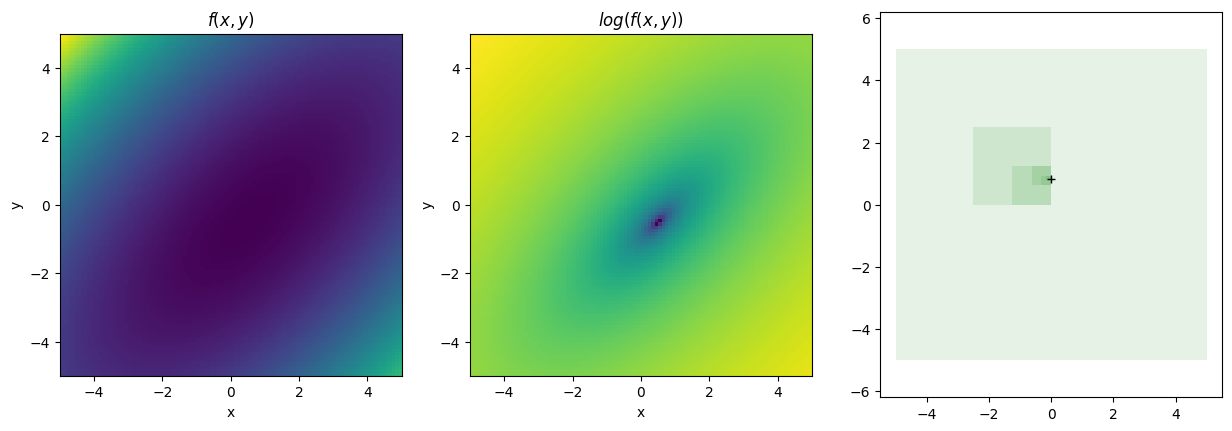

In [18]:
a, b = -5, 5
c, d = -5, 5

fig = plt.figure(figsize=(15,5))
x = np.linspace(a,b, 100)
y = np.linspace(c,d, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
Zlog = np.log(Z)
plt.subplot(1,3,1)
plt.imshow(Z, extent=(a, b, c, d))
plt.title('$f(x,y)$')
plt.xlabel('x')
plt.ylabel('y')
plt.subplot(1,3,2)
plt.imshow(Zlog, extent=(a, b, c, d))
plt.title('$log(f(x,y))$')
plt.xlabel('x')
plt.ylabel('y')

ax = plt.subplot(1,3,3)
rectangles = []
for _ in range(10):
    rectangle = plt.Rectangle((a, c), b-a, d-c, facecolor='green', alpha=0.1)
    ax.add_patch(rectangle)
    f1 = f(a, c)
    f2 = f(a, d)
    f3 = f(b, c)
    f4 = f(b, d)
    if f1<=f2 and f1<=f3 and f1<=f4:
        b = (a+b)/2
        d = (c+d)/2
    if f2<=f1 and f2<=f3 and f2<=f4:
        b = (a+b)/2
        c = (c+d)/2
    if f3<=f2 and f3<=f1 and f3<=f4:
        a = (a+b)/2
        d = (c+d)/2
    if f4<=f2 and f4<=f3 and f4<=f1:
        a = (a+b)/2
        c = (c+d)/2
plt.plot((a+b)/2, (c+d)/2, '+', color='black')
plt.axis('equal')
plt.show()

### Method 3: Gradient descent

We start by calculating the partial derivatives of the function with respect to $x$ and $y$.

$\frac{\partial f}{\partial x}(x,y) = 2(x+y-1) + \frac{2}{5}(x-y)$

$\frac{\partial f}{\partial y}(x,y) = 2(x+y-1) - \frac{2}{5}(x-y)$

In [19]:
def dfx(x, y):
    return 2*(x+y-1) + 0.4*(x-y)
def dfy(x, y):
    return 2*(x+y-1) - 0.4*(x-y)

In [20]:
lr = 0.6
x = 2.5
y = 3
lx = [x]
ly = [y]
for _ in range(7):
    x = x - lr * dfx(x,y)
    y = y - lr * dfy(x,y)
    lx.append(x)
    ly.append(y)
    print(f'f(x,y) = {f(x,y):.2f} \t (x,y) = ({x:.2f}, {y:.2f})')

f(x,y) = 7.20 	 (x,y) = (-2.78, 2.55)
f(x,y) = 0.85 	 (x,y) = (-0.02, 0.10)
f(x,y) = 0.25 	 (x,y) = (1.11, 0.09)
f(x,y) = 0.04 	 (x,y) = (0.63, 0.56)
f(x,y) = 0.01 	 (x,y) = (0.39, 0.58)
f(x,y) = 0.00 	 (x,y) = (0.47, 0.49)
f(x,y) = 0.00 	 (x,y) = (0.52, 0.48)


In [21]:
lr = 0.6
for lr in [0.3, 0.1, 0.01, 1.25]:
    print(f'learning rate: {lr}')
    x = 2.5
    y = 3
    lx = [x]
    ly = [y]
    for _ in range(7):
        x = x - lr * dfx(x,y)
        y = y - lr * dfy(x,y)
        lx.append(x)
        ly.append(y)
        print(f'f(x,y) = {f(x,y):.2f} \t (x,y) = ({x:.2f}, {y:.2f})')
    print('\n\n\n')

learning rate: 0.3
f(x,y) = 0.68 	 (x,y) = (-0.14, 1.51)
f(x,y) = 0.32 	 (x,y) = (-0.16, 1.10)
f(x,y) = 0.16 	 (x,y) = (0.03, 0.90)
f(x,y) = 0.07 	 (x,y) = (0.18, 0.77)
f(x,y) = 0.03 	 (x,y) = (0.28, 0.68)
f(x,y) = 0.01 	 (x,y) = (0.35, 0.62)
f(x,y) = 0.01 	 (x,y) = (0.40, 0.58)




learning rate: 0.1
f(x,y) = 8.14 	 (x,y) = (1.62, 2.22)
f(x,y) = 3.29 	 (x,y) = (1.08, 1.72)
f(x,y) = 1.36 	 (x,y) = (0.74, 1.39)
f(x,y) = 0.58 	 (x,y) = (0.54, 1.17)
f(x,y) = 0.27 	 (x,y) = (0.43, 1.02)
f(x,y) = 0.14 	 (x,y) = (0.36, 0.92)
f(x,y) = 0.08 	 (x,y) = (0.33, 0.84)




learning rate: 0.01
f(x,y) = 18.72 	 (x,y) = (2.41, 2.91)
f(x,y) = 17.27 	 (x,y) = (2.33, 2.82)
f(x,y) = 15.93 	 (x,y) = (2.25, 2.74)
f(x,y) = 14.69 	 (x,y) = (2.17, 2.66)
f(x,y) = 13.55 	 (x,y) = (2.09, 2.58)
f(x,y) = 12.50 	 (x,y) = (2.02, 2.51)
f(x,y) = 11.53 	 (x,y) = (1.95, 2.44)




learning rate: 1.25
f(x,y) = 112.80 	 (x,y) = (-8.50, 13.50)
f(x,y) = 324.80 	 (x,y) = (-7.50, -9.50)
f(x,y) = 1804.80 	 (x,y) = (36.50, -51.50)

A more visual version of the gradient descent method

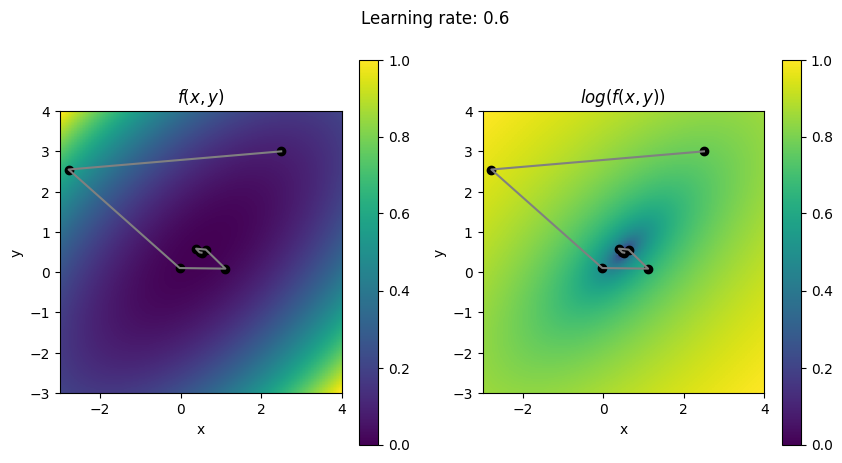

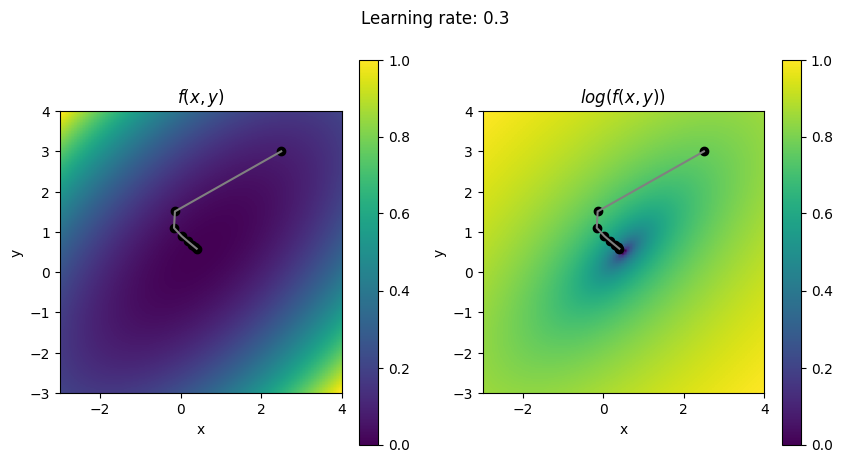

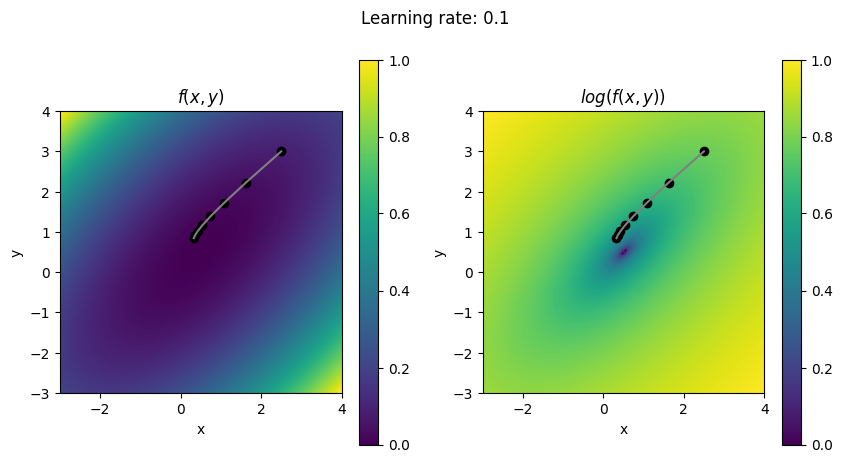

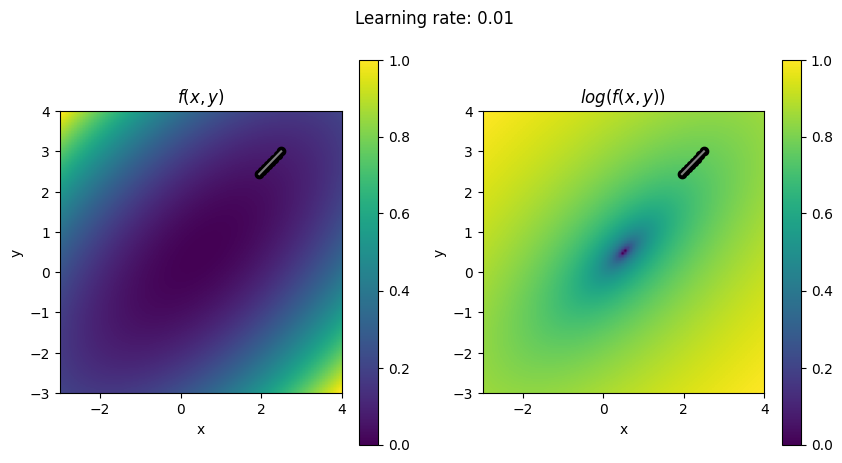

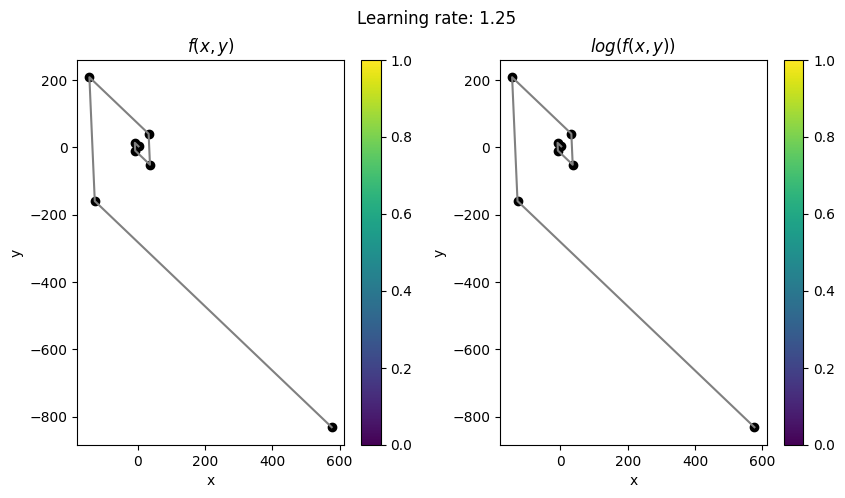

In [22]:
for lr in [0.6, 0.3, 0.1, 0.01, 1.25]:
    x = 2.5
    y = 3
    lx = [x]
    ly = [y]
    for _ in range(7):
        x = x - lr * dfx(x,y)
        y = y - lr * dfy(x,y)
        lx.append(x)
        ly.append(y)
    
    # plot a heatmap of the function with the line search
    x = np.linspace(-3, 4, 100)
    y = np.linspace(-3, 4, 100)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    Zlog = np.log(Z)
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(Z, extent=(-3, 4, -3, 4))
    plt.plot(lx, ly, color='grey')
    plt.scatter(lx, ly, color='black')
    plt.colorbar()
    plt.title('$f(x,y)$')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.subplot(1,2,2)
    plt.imshow(Zlog, extent=(-3, 4, -3, 4))
    plt.plot(lx, ly, color='grey')
    plt.scatter(lx, ly, color='black')
    plt.colorbar()
    plt.title('$log(f(x,y))$')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.suptitle(f'Learning rate: {lr}')
    plt.show()


---

# Linear regression

We want to find the line of best fit for the following points:
- $P_1 = (0,1)$
- $P_2 = (3,8)$
- $P_4 = (5,12)$
- $P_5 = (8,17)$

The line of best fit is given by the equation $y = ax + b$ where $a$ is the slope and $b$ is the $y$-intercept.

Let's define the loss function as the sum of squared errors:
$$\mathcal{L}(a,b) = \sum_{i=1}^{n} (y_i - (ax_i + b))^2$$
so 
$$\mathcal{L}(a,b) = (1 - (0a + b))^2 + (8 - (3a + b))^2 + (12 - (5a + b))^2 + (17 - (8a + b))^2$$

We can find the minimum of the loss function by taking the partial derivatives with respect to $a$ and $b$ and setting them to zero.

With respect to $a$:

$\frac{\partial \mathcal{L}}{\partial a} (a,b) = -2(1 - (0a + b))0 + -2(8 - (3a + b))3 + -2(12 - (5a + b))5 + -2(17 - (8a + b))8$

$\frac{\partial \mathcal{L}}{\partial a} (a,b) = -6(-3a -b+8) + -10(-5a -b+12) + -16(-8a -b+17)$

$\frac{\partial \mathcal{L}}{\partial a} (a,b) = 18a + 6b - 48 + 50a + 10b - 120 + 128a + 16b - 272$

$\frac{\partial \mathcal{L}}{\partial a} (a,b) = 196a + 32b - 440$

With respect to $b$:

$\frac{\partial \mathcal{L}}{\partial b} (a,b) = -2(1 - (0a + b)) + -2(8 - (3a + b)) + -2(12 - (5a + b)) + -2(17 - (8a + b))$

$\frac{\partial \mathcal{L}}{\partial b} (a,b) = -2(1 - b) -2(-3a -b+8) -2(-5a -b+12) -2(-8a -b+17)$

$\frac{\partial \mathcal{L}}{\partial b} (a,b) = 2b - 2 + 6a + 2b - 16 + 10a + 2b - 24 + 16a + 2b - 34$

$\frac{\partial \mathcal{L}}{\partial b} (a,b) = 8b - 76 + 32a$

Setting the partial derivatives to zero:

$196a + 32b - 440 = 0 \quad$ and $\quad 8b - 76 + 32a = 0$

So $b = 9.5 - 4a$

Hence, $196a + 32(9.5 - 4a) - 440 = 0$<br>
$\implies 196a + 304 - 128a - 440 = 0$<br>
$\implies 68a = 136$<br>
$\implies a = 2$

Finally, $b = 9.5 - 4(2) = 1.5$


Hence, the line of best fit is $y = 2x + 1.5$